In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

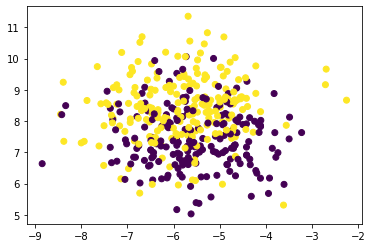

In [2]:
n=5
X, y = make_blobs(n_samples=500,n_features=2, centers=2, random_state=n)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=n)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [3]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65        54
           1       0.60      0.70      0.65        46

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.66      0.65      0.65       100



In [4]:
knn.predict([[1,1]])

array([0])

# Naive Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71        50
           1       0.72      0.66      0.69        50

    accuracy                           0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.70      0.70      0.70       100



### Dataset Titanic

In [12]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/afifai/pelatihan_machinelearning/master/data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df = df.drop(columns=['Name','Ticket','Cabin','Embarked'],axis=1)
df.set_index('PassengerId',inplace=True)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [16]:
X = df.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=n)

In [17]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
98,1,male,23.0,0,1,63.3583
743,1,female,21.0,2,2,262.3750
755,2,female,48.0,1,2,65.0000
840,1,male,NaN,0,0,29.7000
185,3,female,4.0,0,2,22.0250
...,...,...,...,...,...,...
401,3,male,39.0,0,0,7.9250
119,1,male,24.0,0,1,247.5208
702,1,male,35.0,0,0,26.2875


In [19]:
X_train.isna().sum()

Pclass      0
Sex         0
Age       137
SibSp       0
Parch       0
Fare        0
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [22]:
cat_cols = 'Sex'

In [23]:
X_train_cat = X_train[cat_cols]
X_train_cat

PassengerId
98       male
743    female
755    female
840      male
185    female
        ...  
401      male
119      male
702      male
207      male
868      male
Name: Sex, Length: 668, dtype: object

In [28]:
X_train_num = X_train.drop(cat_cols,axis=1)
X_train_num

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
98,1,23.0,0,1,63.3583
743,1,21.0,2,2,262.3750
755,2,48.0,1,2,65.0000
840,1,NaN,0,0,29.7000
185,3,4.0,0,2,22.0250
...,...,...,...,...,...
401,3,39.0,0,0,7.9250
119,1,24.0,0,1,247.5208
702,1,35.0,0,0,26.2875


In [29]:
X_test_cat = X_test[cat_cols]
X_test_num = X_test.drop(cat_cols,axis=1)

In [43]:
imputer = SimpleImputer(strategy='median')
X_train_num_prep = imputer.fit_transform(X_train_num)
X_test_num_prep = imputer.transform(X_test_num)


In [44]:
scaler = StandardScaler()
X_train_num_prep  = scaler.fit_transform(X_train_num_prep)
X_test_num_prep = scaler.transform(X_test_num_prep)


In [45]:
le = LabelEncoder()
X_train_cat_prep = le.fit_transform(X_train_cat)
X_test_cat_prep = le.transform(X_test_cat)

In [46]:
import numpy as np

In [47]:
X_train_all = np.column_stack([X_train_num_prep,X_train_cat_prep])
X_test_all = np.column_stack([X_test_num_prep,X_test_cat_prep])

In [48]:
X_train_all.shape

(668, 6)

In [49]:
y_train.shape

(668,)

In [50]:
pd.DataFrame(X_train_all).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [52]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_all,y_train)

y_test_pred = model.predict(X_test_all)